# Day 8

## Common

In [2]:
import re

def load(input_file):
    with open(input_file) as f:
        raw = f.read().split("\n")
   
    commands = [c for c in raw[0]]
    directions = { re.findall('[A-Z0-9]{3}', r)[0]:
                  (re.findall('[A-Z0-9]{3}', r)[1],
                   re.findall('[A-Z0-9]{3}', r)[2]) for r in raw[2:]}
    return (commands, directions)

## Part 1

In [1]:
def part1(input_file):
    cmds, dirs = load(input_file)
    p = 'AAA'
    i = 0
    while not p == 'ZZZ':
        cmd = cmds[i % len(cmds)]
        p = dirs[p][0] if cmd=='L' else dirs[p][1]
        i += 1
    print(f'{i=}')

In [2]:
part1('08_test_part1.txt')

i=6


In [3]:
part1('08_input.txt')

i=19783


## Part 2

In [4]:
def part2(input_file):
    cmds, dirs = load(input_file)
    ps = [ key for key in list(dirs.keys()) if key[2]=='A' ] # positions
    i = 0
    while not all([p[2]=='Z' for p in ps]):
        cmd = cmds[i % len(cmds)]
        ps = [dirs[p][0] if cmd=='L' else dirs[p][1] for p in ps]
        i += 1
    print(f'{i=}')

In [5]:
part2('08_test_part2.txt')

i=6


In [ ]:
# part2('08_input.txt') this does not work for some reason

## Part 2, ernsthaft jetzt (seriously now)

In [3]:
cmds, dirs = load("08_input.txt")
ps = [ key for key in list(dirs.keys()) if key[2]=='A' ] # positions
i = 0

i_where_z = []
for _ in ps:
    i_where_z.append([])

while not all([len(a)>4 for a in i_where_z]):
    cmd = cmds[i % len(cmds)]
    ps = [dirs[p][0] if cmd=='L' else dirs[p][1] for p in ps]
    for j, p_ in enumerate(ps):
        if p_[2]=='Z':
            i_where_z[j].append(i)
    i += 1
    
import numpy as np
for aa in i_where_z:
    print(np.diff(np.array(aa)))

[11653 11653 11653 11653 11653 11653 11653]
[19783 19783 19783 19783]
[19241 19241 19241 19241]
[16531 16531 16531 16531]
[12737 12737 12737 12737 12737 12737]
[14363 14363 14363 14363 14363]


Periodizitäten treten auf --> kleinestes gemeinsames Vielfaches finden

https://de.wikipedia.org/wiki/Kleinstes_gemeinsames_Vielfaches

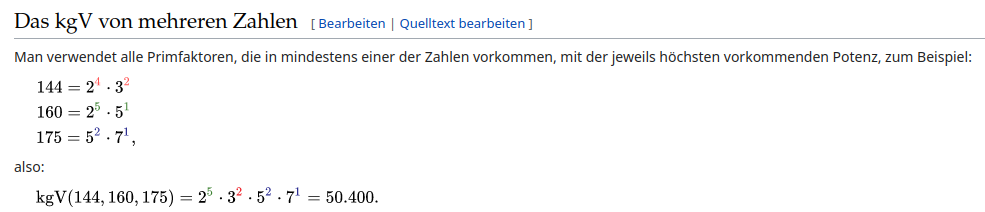

Algo für Primfaktorzerlegung:

https://stackoverflow.com/questions/15347174/python-finding-prime-factors

In [4]:
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

In [10]:
tmp = [list(np.diff(np.array(aa))) for aa in i_where_z]
periods = [tmp_[0] for tmp_ in tmp]
periods

[11653, 19783, 19241, 16531, 12737, 14363]

In [16]:
all_factors = []
for period in periods:
    print(prime_factors(period))
    all_factors += prime_factors(period)

all_factors = set(all_factors)
print(all_factors)

[43, 271]
[73, 271]
[71, 271]
[61, 271]
[47, 271]
[53, 271]
{71, 73, 43, 271, 47, 53, 61}


In [17]:
from functools import reduce
reduce(lambda x,y: x*y, all_factors)

9177460370549